<a href="https://colab.research.google.com/github/Nickguild1993/machine_learning_models/blob/main/Unsupervised_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Cluster Analysis- KMeans

***K-Means Clustering***

Clustering technique utilized for grouping datapoints into clusters.

Centroids are the central points used to create those clusters.
- By measuring the distance of each point from the centroids, you are able to "categorize" them to that cluster.
- Then you try to improve the model by *adjusting* the centroids to find what you could think of as a central hub.
- **Goal** is to continue recomputing the clusters until the given data points stop changing clusters

**The Challenge** of clustering is to determine the correct amount of clusters for fitting the data points.
- **SOLUTION:** utlize the **Elbow Method** to determine the diminishing returns cutoff point. (elbow point = inflection point)
- id est. you ascertain the ideal number of clusters by adding additional centroids until increasing their number *does not improve* the modeling of the data.
- Using the Sum of Square Error for each cluster.  (SSE2)
- To **confirm** the elbow method, use the **Silhouette Score** as a way to double check.

In [31]:
# Import dependencies 

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
# Import machine learning specific libraries

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler



In [2]:
# Get csv file

from google.colab import files
uploaded = files.upload()

Saving Country_data.csv to Country_data (5).csv


In [3]:
import io

df = pd.read_csv(io.BytesIO(uploaded["Country_data.csv"]))
df.head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


### Exploratory Data Analysis

In [4]:
# get the shape of the dataset

df.shape
# 167 rows, 10 columns

(167, 10)

In [5]:
# checking column data types

df.info()

# df.info() is more revealing than df.dtypes because it not only relays Dtype, but also Non-Null counts
# which you can compare against the row values returned from df.shape (also in the RangeIndex below)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


FYI about Data Types in Python
- Strings are classified as objects, which makes them more malleable
- Int64 store whole numbers
- float64 (and numeric) store decimal values


We don't have any missing values, but if we did, we could either impute them or drop the rows all together.

***Should we delve into how imputing and dropping work for null values? ***** 

In [6]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [7]:
# gdpp should be gdp. changing column name

df = df.rename(columns={"gdpp" : "gdp"})

In [8]:
# checking to see what a random row looks like

df[df["country"]== "Australia"]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdp
7,Australia,4.8,19.8,8.73,20.9,41400,1.16,82.0,1.93,51900


In [9]:
# Moving countries to an array so that we can examine the numeric columns
countries = np.array(df["country"])
countries[:5]

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda'], dtype=object)

In [10]:
# dropping country from dataframe

df = df.drop("country", axis=1)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


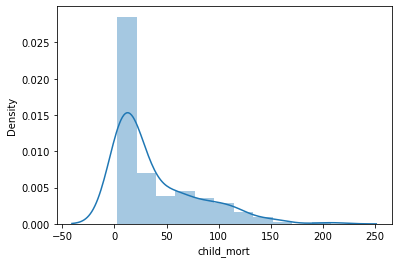

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


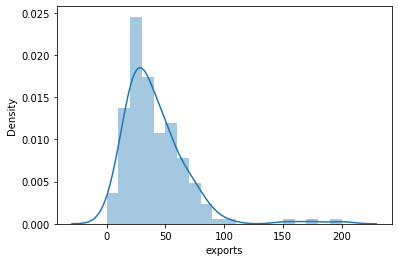

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


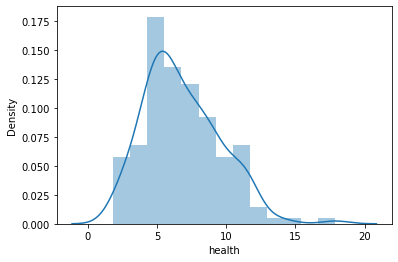

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


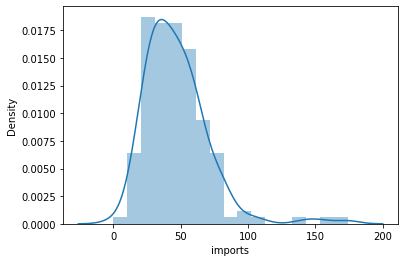

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


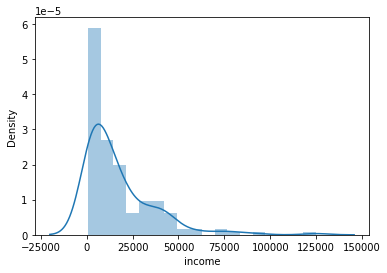

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


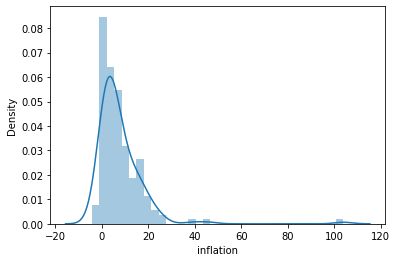

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


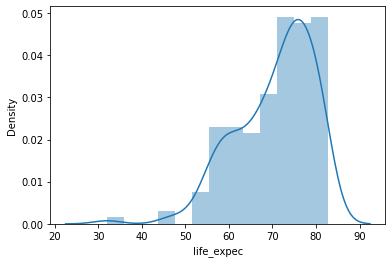

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


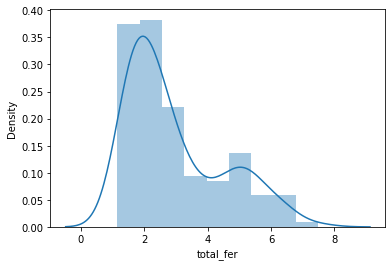

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


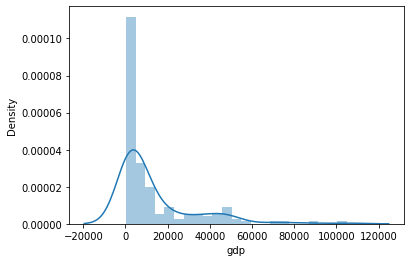

In [11]:
# Plotting histograms
for column in df.columns:
  plt.figure(figsize=(6,4))
  sns.distplot(df[column])
  plt.show()

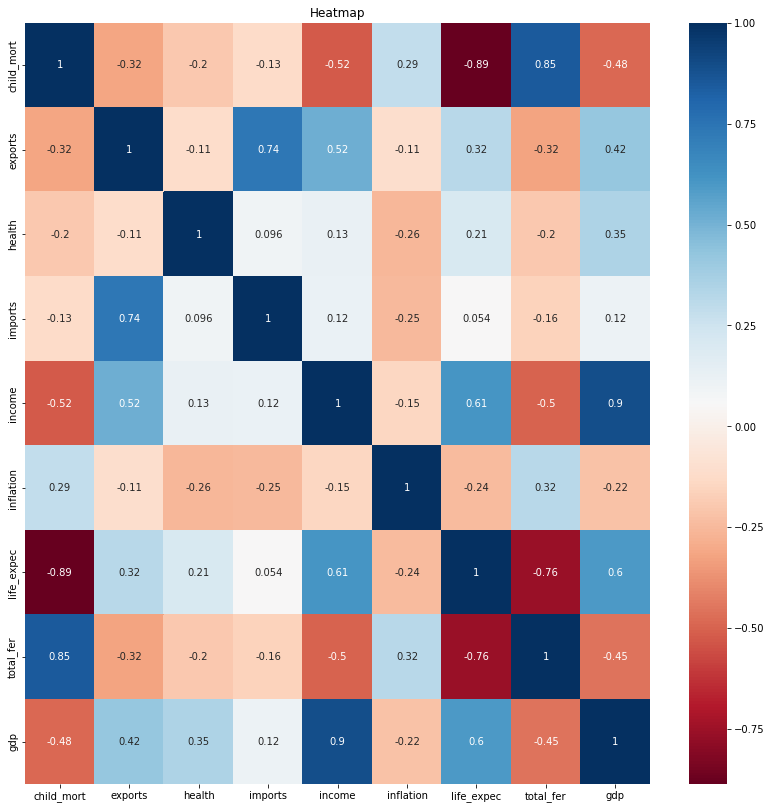

In [12]:
# creating heatmap

plt.figure(figsize=(14,14))

plt.rcParams.update({"font.size": 10})

corr_df = df.corr()
sns.heatmap(corr_df, annot=True, cmap="RdBu")
plt.title("Heatmap")
plt.show()


Text(0.5, 6.799999999999997, 'Life Expectancy')

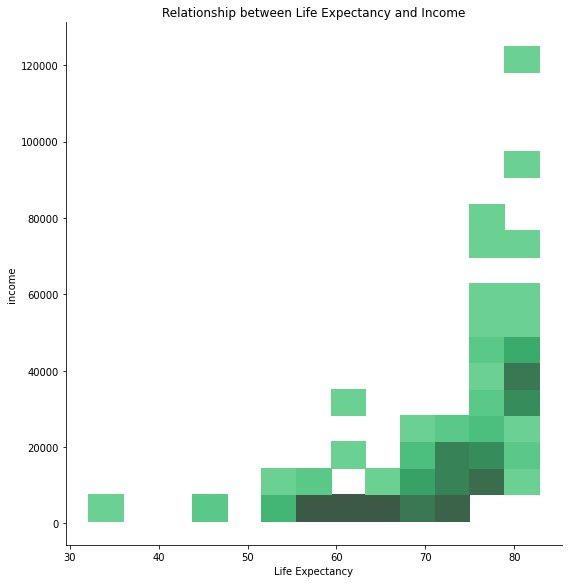

In [30]:
# looking at income and life expectancy 
sns.displot(data=df, x=df["life_expec"], y=df["income"], color="seagreen", height=8)
plt.title("Relationship between Life Expectancy and Income")
plt.xlabel("Life Expectancy")

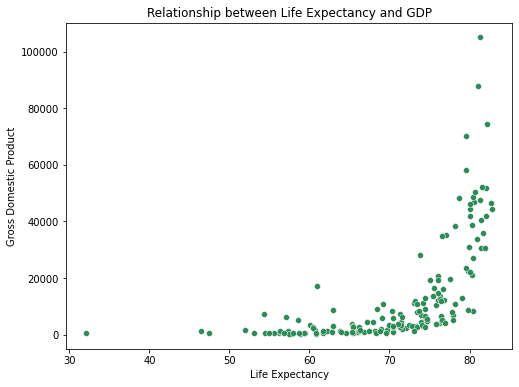

In [28]:
# looking at gdp and life expectancy

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x=df["life_expec"], y=df["gdp"], color="seagreen")
plt.title("Relationship between Life Expectancy and GDP")
plt.xlabel("Life Expectancy")
plt.ylabel("Gross Domestic Product")
plt.show()

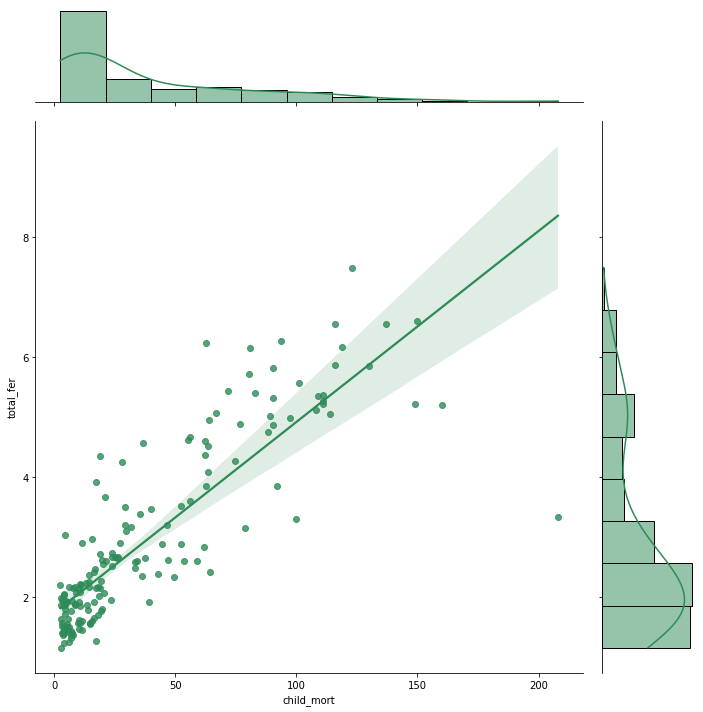

In [29]:
# child mortality v. total fertility 

sns.jointplot(data=df, x=df["child_mort"], y=df["total_fer"], color= "seagreen", kind="reg", height=10)
plt.show()


### Preprocessing features 

In [34]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X = sc.fit_transform(df)

In [35]:
scaled_df = pd.DataFrame(X, columns = df.columns)

scaled_df.head(5)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


### KMeans

Elbow Curve Graph

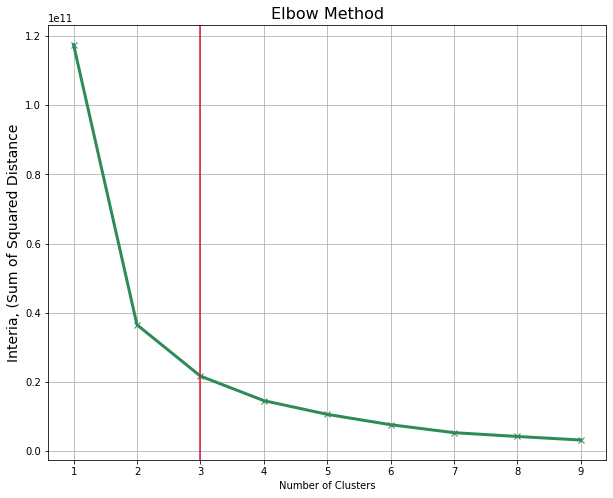

In [128]:
clusterdistance = []

K = range(1,10)

for cluster in K:
  kmean = KMeans(n_clusters=cluster)
  kmean.fit(df)
  clusterdistance.append(kmean.inertia_)

plt.figure(figsize=(10,8))
plt.plot(K, clusterdistance, marker="x", color="seagreen", linewidth = 3)
plt.title("Elbow Method", fontsize=16)
plt.ylabel("Interia, (Sum of Squared Distance", fontsize=14)
plt.xlabel("Number of Clusters")
plt.axvline(3, color="crimson")
plt.grid("y")
plt.show()

Looks like the bend occurs at n_clusters = 3

In [70]:
kmeans = KMeans(n_clusters = 3, random_state=0)
kmeans.fit(scaled_df)

KMeans(n_clusters=3, random_state=0)

In [71]:
# Record counts in the clusters

pd.Series(kmeans.labels_).value_counts()

1    84
0    47
2    36
dtype: int64

Using Silhouette Score to confirm cluster count

In [48]:
from sklearn.metrics import silhouette_score

In [72]:
# Testing
silhouette_score(X, kmeans.labels_)

0.28329575683463126

In [73]:
# Creating list of cluster count scenarios

kmeans_per_k = [KMeans(n_clusters=k, random_state=0).fit(X) for k in range(1,10)]

silhouette_scores = [silhouette_score(X, model.labels_)
for model in kmeans_per_k[1:]]

silhouette_scores

[0.28735668921406704,
 0.28329575683463126,
 0.3021082505899252,
 0.22327899566511256,
 0.23057357437984735,
 0.25179867083491136,
 0.222488864927923,
 0.23530641350791914]

While 4 clusters technically has a better Silhouette Score, that's because of 3 outliers that belong to that 4th cluster.  Going to stay with 3 clusters.

### Prediction

In [74]:
# predicting values

cluster_labels = kmeans.fit_predict(scaled_df)

In [75]:
preds = kmeans.labels_ 
kmeans_df = pd.DataFrame(df)
kmeans_df["KMeans_Clusters"] = preds
kmeans_df.sample(10)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdp,KMeans_Clusters
116,92.1,13.50,2.20,19.4,4280,10.90,65.3,3.85,1040,0
20,6.9,29.70,11.10,51.3,9720,1.40,76.8,1.31,4610,1
141,20.7,26.90,4.47,57.1,9920,4.44,71.6,2.07,6230,1
50,55.2,4.79,2.66,23.3,1420,11.60,61.7,4.61,482,0
131,14.4,93.80,3.40,108.0,20400,-4.21,73.4,2.17,10800,1
11,8.6,69.50,4.97,50.9,41100,7.44,76.0,2.16,20700,2
15,4.5,76.40,10.70,74.7,41100,1.88,80.0,1.86,44400,2
63,109.0,30.30,4.93,43.2,1190,16.10,58.0,5.34,648,0
98,6.8,153.00,8.65,154.0,28300,3.83,80.3,1.36,21100,2
55,63.7,57.70,3.50,18.9,15400,16.60,62.9,4.08,8750,0


### Visualizations

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


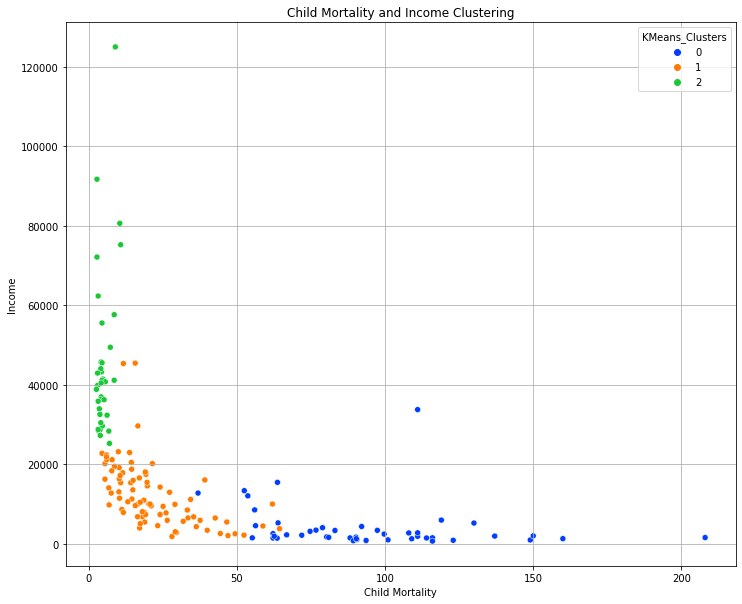

In [82]:
# let's look at child mortality and income

plt.figure(figsize=(12,10))

sns.scatterplot(kmeans_df["child_mort"], kmeans_df["income"], hue="KMeans_Clusters",data=kmeans_df, palette="bright")
plt.title("Child Mortality and Income Clustering", fontsize=16)
plt.xlabel("Child Mortality")
plt.ylabel("Income")
plt.grid("y")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


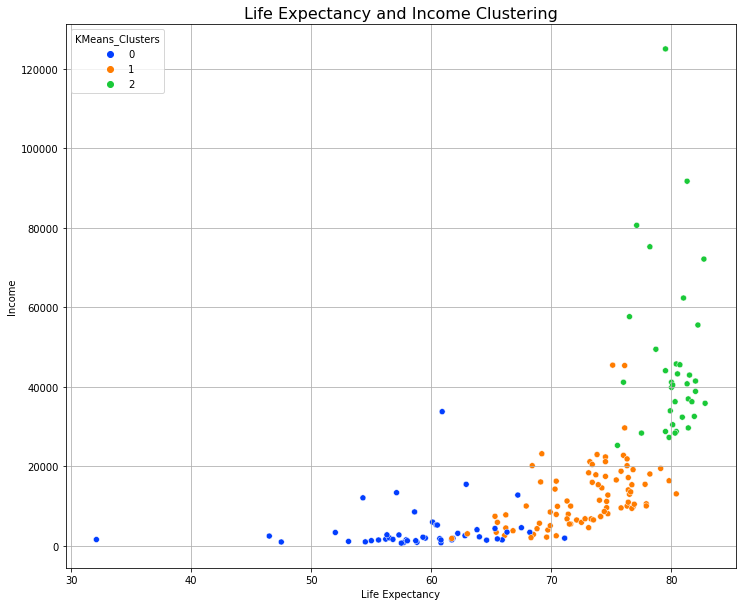

In [85]:
# Life expectancy vs income

plt.figure(figsize=(12,10))

sns.scatterplot(kmeans_df["life_expec"], kmeans_df["income"], hue = "KMeans_Clusters", data=kmeans_df, palette="bright")
plt.title("Life Expectancy and Income Clustering", fontsize=16)
plt.xlabel("Life Expectancy")
plt.ylabel("Income")
plt.grid("y")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


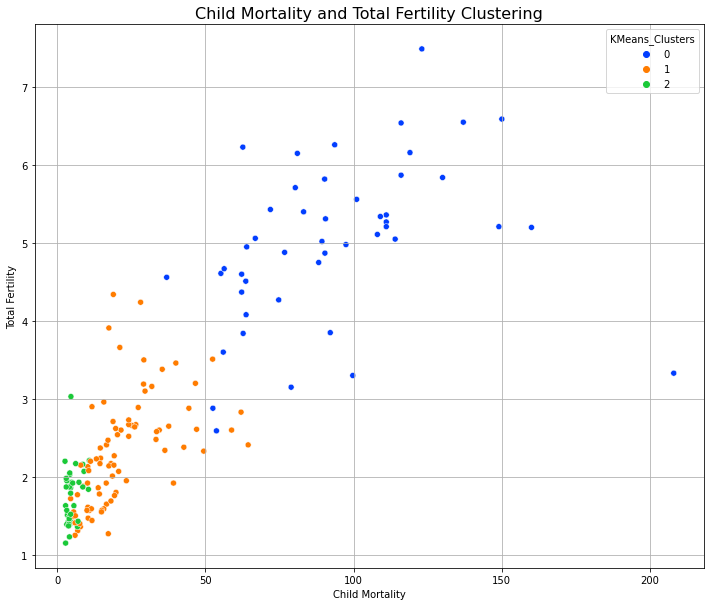

In [86]:
# Child mortality vs total fertility 

plt.figure(figsize=(12,10))

sns.scatterplot(kmeans_df["child_mort"], kmeans_df["total_fer"], hue="KMeans_Clusters", data=kmeans_df, palette="bright")
plt.title("Child Mortality and Total Fertility Clustering", fontsize=16)
plt.xlabel("Child Mortality")
plt.ylabel("Total Fertility")
plt.grid("y")
plt.show()

Based on the visualizations, the three clusters indicate the following:
- Cluster 0 = Under Developing Nation
- Cluster 1 = Developing Nation
- Cluster 2 = Developed Nation

In [88]:
# adding in the numpy array of Countries that we took out of the dataframe earlier.

country_df = pd.DataFrame(countries, columns=["Country"])
country_df.head(3)

,Country
0,Afghanistan
1,Albania
2,Algeria


In [89]:
merged_df = df.merge(country_df, left_index=True, right_index=True)
merged_df.head(3) 

In [93]:
under_dev = merged_df[merged_df["KMeans_Clusters"]==0]
working_dev = merged_df[merged_df["KMeans_Clusters"]==1]
developed = merged_df[merged_df["KMeans_Clusters"]==2]

print("The number of under-developing nations is:", len(under_dev))
print("The number of developing nations is:", len(working_dev))
print("The number of developed nations is:", len(developed))

The number of under-developing nations is: 47
The number of developing nations is: 84
The number of developed nations is: 36


In [98]:
print("The 47 under-developing countries are:")
list(under_dev.Country)

The 47 under-developing countries are:


['Afghanistan',
 'Angola',
 'Benin',
 'Botswana',
 'Burkina Faso',
 'Burundi',
 'Cameroon',
 'Central African Republic',
 'Chad',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 "Cote d'Ivoire",
 'Equatorial Guinea',
 'Eritrea',
 'Gabon',
 'Gambia',
 'Ghana',
 'Guinea',
 'Guinea-Bissau',
 'Haiti',
 'Iraq',
 'Kenya',
 'Kiribati',
 'Lao',
 'Lesotho',
 'Liberia',
 'Madagascar',
 'Malawi',
 'Mali',
 'Mauritania',
 'Mozambique',
 'Namibia',
 'Niger',
 'Nigeria',
 'Pakistan',
 'Rwanda',
 'Senegal',
 'Sierra Leone',
 'South Africa',
 'Sudan',
 'Tanzania',
 'Timor-Leste',
 'Togo',
 'Uganda',
 'Yemen',
 'Zambia']

In [100]:
print("The  84 developing nations are:")
list(working_dev.Country)

The  84 developing nations are:


['Albania',
 'Algeria',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Azerbaijan',
 'Bahamas',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belize',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Brazil',
 'Bulgaria',
 'Cambodia',
 'Cape Verde',
 'Chile',
 'China',
 'Colombia',
 'Costa Rica',
 'Croatia',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Estonia',
 'Fiji',
 'Georgia',
 'Grenada',
 'Guatemala',
 'Guyana',
 'Hungary',
 'India',
 'Indonesia',
 'Iran',
 'Jamaica',
 'Jordan',
 'Kazakhstan',
 'Kyrgyz Republic',
 'Latvia',
 'Lebanon',
 'Libya',
 'Lithuania',
 'Macedonia, FYR',
 'Malaysia',
 'Maldives',
 'Mauritius',
 'Micronesia, Fed. Sts.',
 'Moldova',
 'Mongolia',
 'Montenegro',
 'Morocco',
 'Myanmar',
 'Nepal',
 'Oman',
 'Panama',
 'Paraguay',
 'Peru',
 'Philippines',
 'Poland',
 'Romania',
 'Russia',
 'Samoa',
 'Saudi Arabia',
 'Serbia',
 'Seychelles',
 'Solomon Islands',
 'Sri Lanka',
 'St. Vincent and the Grenadines',
 'Suriname',
 'Tajikistan',
 'Th

In [102]:
print("The 36 developed nations are:")
list(developed.Country)

The 36 developed nations are:


['Australia',
 'Austria',
 'Bahrain',
 'Belgium',
 'Brunei',
 'Canada',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Iceland',
 'Ireland',
 'Israel',
 'Italy',
 'Japan',
 'Kuwait',
 'Luxembourg',
 'Malta',
 'Netherlands',
 'New Zealand',
 'Norway',
 'Portugal',
 'Qatar',
 'Singapore',
 'Slovak Republic',
 'Slovenia',
 'South Korea',
 'Spain',
 'Sweden',
 'Switzerland',
 'United Arab Emirates',
 'United Kingdom',
 'United States']

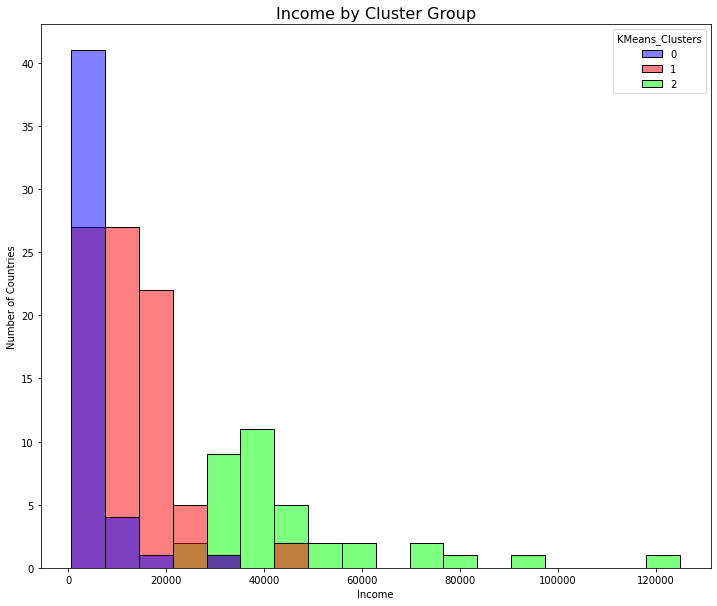

In [105]:
f, ax = plt.subplots(figsize=(12,10))
sns.histplot(data=merged_df, x ="income", hue="KMeans_Clusters", palette="brg", element="bars")
plt.title("Income by Cluster Group", fontsize=16)
plt.xlabel("Income")
plt.ylabel("Number of Countries")
plt.show()

In [120]:
under_mean = under_dev["income"].mean()
working_mean = working_dev["income"].mean()
developed_mean = developed["income"].mean()

under_mean = round(under_mean, 2)
working_mean = round(working_mean, 2)
developed_mean = round(developed_mean, 2)

print("Under Developing Countries mean income:","$", under_mean)
print("Developing Countires mean income:", "$", working_mean)
print("Developed Countires mean income:", "$", developed_mean)

Under Developing Countries mean income: $ 3942.4
Developing Countires mean income: $ 12305.6
Developed Countires mean income: $ 45672.22


Could go on about doing .groupby( ) functions to add columns to the dataframe- not sure if we want to delve into that, or if that would be better served as an additonal presentation

1870.0